## 基本系統設置

In [ ]:
# 更改繁體中文語系
# !chcp 65001
!chcp 437

Active code page: 437


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [ ]:
# 安裝必須設置
import sys
import subprocess
import pkg_resources

required = {'kaggle', 'tensorflow'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)

## 使用kaggle下載資料集

In [ ]:
import json
import os
import subprocess

# Define the API token for Kaggle authentication
api_token = {"username": "pinhsuanlee", "key": "28c330210349e9af127aaf6f88dfa39f"}

# Specify the directory where the Kaggle data will be stored
data_dir = "kaggle_data"

# Construct the path for the Kaggle API credentials file
api_js_file = os.path.join(data_dir, "kaggle.json")  # Removed the leading slash from the file name

# Create the data directory if it does not exist
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Write the API token to the credentials file
with open(api_js_file, 'w') as file:
    json.dump(api_token, file)

# Set the file permissions to read and write for the owner (600 in octal)
os.chmod(api_js_file, 0o600)

# Set the environment variable for the Kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = data_dir

# Download the specified Kaggle dataset using the Kaggle API
subprocess.run(["kaggle", "datasets", "download", "-d", "pinhsuanlee/t-max-sxv1", "--force"])  # Corrected 'runn' to 'run'

# List the contents of the data directory and print them
print(os.listdir(data_dir))


['kaggle.json']


In [ ]:
# 解壓縮資料集
import zipfile

zip_data = 't-max-sxv1.zip'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

if os.path.exists(zip_data):
    with zipfile.ZipFile(zip_data, 'r') as zip_ref: # 解壓縮
        zip_ref.extractall(data_dir)

In [ ]:
# 設置基本資料夾
data_dir = os.path.join(data_dir, 'dataset')

test_dir = os.path.join(data_dir, 'test_set')
test_good_dir = os.path.join(test_dir, 'good')
test_bad_dir = os.path.join(test_dir, 'bad')
train_dir = os.path.join(data_dir, 'training_set')
train_good_dir = os.path.join(train_dir, 'good')
train_bad_dir = os.path.join(train_dir, 'bad')

In [ ]:
# 基本資料數量
def img_num_in_dir(dir_path):
    return len(os.listdir(dir_path))

print(
    f"""
    There are:
        {img_num_in_dir(train_good_dir)} good picture for training,
        {img_num_in_dir(train_bad_dir)} bad picture for training,
        {img_num_in_dir(test_good_dir)} good picture for testing,
        {img_num_in_dir(test_bad_dir)} bad picture for testing.
    """
)


    There are: 
        10 good picture for training,
        32 bad picture for training,
        2 good picture for testing,
        8 bad picture for testing.
    


In [ ]:
32/42, 8/10

(0.7619047619047619, 0.8)

## 圖片基本性質

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
os.listdir(train_good_dir)

['good(2).png',
 'good(4).png',
 'good(6).png',
 'good(3).png',
 'good(5).png',
 'good(7).png',
 'good(8).png',
 'good(1).png',
 'good(9).png',
 'good(10).png']

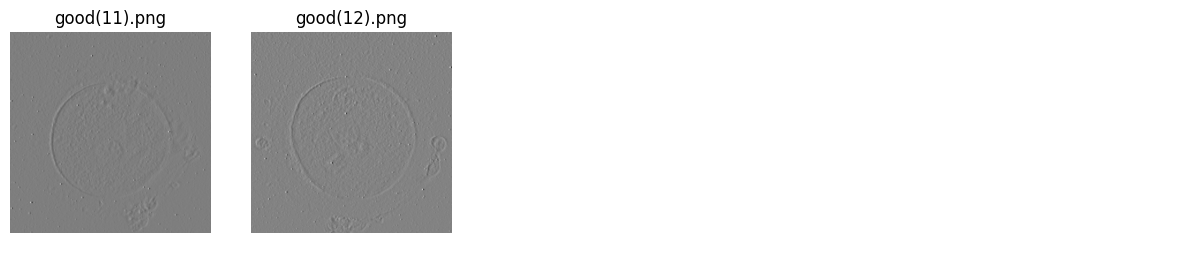

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

target_dir = test_good_dir
target_images = os.listdir(target_dir)

clomn_number = 5
row_number = int(np.ceil(len(target_images) / clomn_number))
fig_size = (clomn_number*3, row_number*3)

fig, axs = plt.subplots(row_number, clomn_number, figsize=fig_size)

# 確保axs始終是二維的
if row_number == 1:
    axs = axs[np.newaxis, :]  # 將axs轉換為二維陣列

for i, image in enumerate(target_images):
    image_path = os.path.join(target_dir, image)
    img = np.asarray(Image.open(image_path))

    ax = axs[i // clomn_number, i % clomn_number]
    ax.imshow(img, cmap='gray')
    ax.set_title(image)
    ax.axis('off')

# 將多出來的子圖設置為空
for i in range(len(target_images), row_number * clomn_number):
    ax = axs[i // clomn_number, i % clomn_number]
    ax.axis('off')

plt.show()

In [ ]:
# 了解隨機圖像的資訊
import random
sample_dir = train_bad_dir
sample_name = random.choice(os.listdir(sample_dir))
sample_path = os.path.join(sample_dir, sample_name)

sample_image = Image.open(image_path)
print(f'''
      Name of sample image:   {sample_name}
      Format of sample image: {sample_image.format}
      Size of sample image:   {sample_image.size}
      Mode of sample image:   {sample_image.mode}''')
sample_image.show()


      Name of sample image:   bad(25).png
      Format of sample image: PNG
      Size of sample image:   (700, 700)
      Mode of sample image:   L


In [ ]:
np.set_printoptions(threshold=np.inf)
sample_array = np.array(sample_image)
print(sample_array)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print([(a.max(), a.min()) for a in sample_array])
print(np.array([a.max() for a in sample_array]).max())
print(np.array([a.min() for a in sample_array]).min())

[(164, 91), (151, 105), (138, 114), (138, 115), (139, 114), (185, 70), (200, 52), (235, 23), (235, 23), (203, 49), (188, 70), (153, 92), (153, 94), (153, 99), (148, 108), (149, 114), (162, 96), (173, 88), (194, 74), (194, 72), (170, 90), (159, 96), (154, 101), (171, 90), (171, 90), (162, 100), (151, 104), (145, 106), (159, 96), (170, 85), (181, 64), (186, 64), (167, 80), (161, 90), (145, 99), (158, 105), (158, 102), (150, 107), (146, 106), (152, 104), (161, 96), (161, 93), (155, 101), (158, 94), (167, 84), (166, 85), (158, 97), (151, 102), (151, 101), (148, 104), (162, 87), (174, 84), (177, 84), (165, 93), (183, 83), (186, 80), (167, 93), (165, 88), (181, 80), (186, 74), (178, 88), (167, 96), (151, 109), (148, 101), (154, 101), (151, 104), (153, 97), (163, 84), (166, 84), (170, 85), (183, 69), (186, 69), (175, 74), (167, 85), (159, 93), (177, 78), (177, 75), (165, 87), (144, 96), (143, 112), (142, 112), (153, 102), (158, 94), (179, 79), (179, 79), (163, 89), (158, 97), (142, 114), (142

In [ ]:
import tensorflow as tf

# 設定資料集參數
batch_size = 1
img_height = 700
img_width = 700

# 從目錄創建訓練資料集
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,  # 訓練資料集的目錄
    labels='inferred',          # 從子資料夾名稱推斷標籤
    label_mode='binary',        # 二元分類
    color_mode='grayscale',     # 灰階圖像
    batch_size=batch_size,
    image_size=(img_height, img_width),  # 調整圖像大小
    shuffle=True,               # 打亂資料
)
# 從目錄創建訓練資料集
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,  # 訓練資料集的目錄
    labels='inferred',          # 從子資料夾名稱推斷標籤
    label_mode='binary',        # 二元分類
    color_mode='grayscale',     # 灰階圖像
    batch_size=batch_size,
    image_size=(img_height, img_width),  # 調整圖像大小
)

# 設定預處理層
normalization_layer = tf.keras.layers.Rescaling(1./255)  # 將像素值歸一化到 [0,1]
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# 設定資料集性能參數
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 42 files belonging to 2 classes.
Found 10 files belonging to 2 classes.


## 建立模型

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses

def senior_sister_net():
    inputs = tf.keras.layers.Input(shape=(700, 700, 1))
    x = layers.Conv2D(filters=20, kernel_size=13, strides=4, activation='relu')(inputs)
    x = layers.Conv2D(filters=30, kernel_size=13, strides=4, activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(units=1000, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    return models.Model(inputs=inputs, outputs=outputs)

# Create an instance of the model
net = senior_sister_net()

# Compile the model
net.compile(optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9),
            loss=losses.BinaryCrossentropy(from_logits=False),
            metrics=['accuracy'])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses

inputs = tf.keras.layers.Input(shape=(700, 700, 1))
x = layers.Conv2D(filters=20, kernel_size=3, strides=2, activation='relu')(inputs)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(filters=20, kernel_size=3, strides=2, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(units=100, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=optimizers.Adam(),
              loss=losses.BinaryCrossentropy(from_logits=False),

              metrics=['accuracy'])

# Train the model
history_2 = model.fit(
      train_ds,
      epochs=300,
      validation_data=test_ds)

Epoch 1/300
42/42 [==============================] - 2s 11ms/step - loss: 0.6182 - accuracy: 0.7619 - val_loss: 0.5431 - val_accuracy: 0.8000
Epoch 2/300
42/42 [==============================] - 0s 5ms/step - loss: 0.5919 - accuracy: 0.7619 - val_loss: 0.5243 - val_accuracy: 0.8000
Epoch 3/300
42/42 [==============================] - 0s 7ms/step - loss: 0.5787 - accuracy: 0.7619 - val_loss: 0.5219 - val_accuracy: 0.8000
Epoch 4/300
42/42 [==============================] - 0s 6ms/step - loss: 0.5765 - accuracy: 0.7619 - val_loss: 0.5208 - val_accuracy: 0.8000
Epoch 5/300
42/42 [==============================] - 0s 5ms/step - loss: 0.5751 - accuracy: 0.7619 - val_loss: 0.5202 - val_accuracy: 0.8000
Epoch 6/300
42/42 [==============================] - 0s 6ms/step - loss: 0.5742 - accuracy: 0.7619 - val_loss: 0.5197 - val_accuracy: 0.8000
Epoch 7/300
42/42 [==============================] - 0s 6ms/step - loss: 0.5734 - accuracy: 0.7619 - val_loss: 0.5193 - val_accuracy: 0.8000
Epoch 8/300


In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 700, 700, 1)]     0         
                                                                 
 conv2d_27 (Conv2D)          (None, 349, 349, 20)      200       
                                                                 
 max_pooling2d (MaxPooling2  (None, 174, 174, 20)      0         
 D)                                                              
                                                                 
 conv2d_28 (Conv2D)          (None, 86, 86, 20)        3620      
                                                                 
 global_average_pooling2d (  (None, 20)                0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten_8 (Flatten)         (None, 20)                0   

In [ ]:
# tf.config.run_functions_eagerly(False)

In [ ]:
input_shape = (700, 700, 1)
net.build(input_shape)

# Train the model
history = net.fit(
      train_ds,
      epochs=10,
      validation_data=test_ds)

Epoch 1/10
42/42 [==============================] - 5s 30ms/step - loss: 4.7389 - accuracy: 0.6667 - val_loss: 0.6193 - val_accuracy: 0.8000
Epoch 2/10
42/42 [==============================] - 1s 15ms/step - loss: 0.5921 - accuracy: 0.7619 - val_loss: 0.5229 - val_accuracy: 0.8000
Epoch 3/10
42/42 [==============================] - 1s 14ms/step - loss: 0.5688 - accuracy: 0.7619 - val_loss: 0.5128 - val_accuracy: 0.8000
Epoch 4/10
42/42 [==============================] - 1s 13ms/step - loss: 0.5665 - accuracy: 0.7619 - val_loss: 0.5114 - val_accuracy: 0.8000
Epoch 5/10
42/42 [==============================] - 1s 14ms/step - loss: 0.5659 - accuracy: 0.7619 - val_loss: 0.5111 - val_accuracy: 0.8000
Epoch 6/10
42/42 [==============================] - 1s 14ms/step - loss: 0.5655 - accuracy: 0.7619 - val_loss: 0.5109 - val_accuracy: 0.8000
Epoch 7/10
42/42 [==============================] - 1s 13ms/step - loss: 0.5651 - accuracy: 0.7619 - val_loss: 0.5107 - val_accuracy: 0.8000
Epoch 8/10
42

In [ ]:
# net.save('path_to_my_model')
# loaded_model = tf.keras.models.load_model('path_to_my_model')

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

def preprocess(img_path, target_size):
    img = tf.keras.preprocessing.image.load_img(img_path, color_mode='grayscale', target_size=target_size)
    img = tf.keras.preprocessing.image.img_to_array(img)
    return np.expand_dims(img, 0)

def get_activations_at(input_img, model, layer_index):
    out_layer = model.layers[layer_index]
    intermediate_model = tf.keras.models.Model(inputs=model.inputs, outputs=out_layer.output)
    return intermediate_model.predict(input_img)

def postprocess_activations(activations, target_size):
    output = np.abs(activations)
    output = np.sum(output, axis=-1).squeeze()
    output = cv2.resize(output, target_size)
    output /= output.max()
    output *= 255
    return 255 - output.astype('uint8')

def apply_heatmap(weights, img):
    heatmap = cv2.applyColorMap(weights, cv2.COLORMAP_JET)
    heatmap = cv2.addWeighted(heatmap, 0.7, img, 0.3, 0)
    return heatmap

def get_intermediate_models(model, layer_indices):
    intermediate_models = []
    for i in layer_indices:
        out_layer = model.layers[i]
        intermediate_model = tf.keras.models.Model(inputs=model.inputs, outputs=out_layer.output)
        intermediate_models.append(intermediate_model)
    return intermediate_models

def plot_heatmap(img_path, target_size, model, layer_indices):
    input_img = preprocess(img_path, target_size=target_size)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    intermediate_models = get_intermediate_models(model, layer_indices)

    level_maps = None
    for intermediate_model in intermediate_models:
        activations = intermediate_model.predict(input_img)
        weights = postprocess_activations(activations, target_size)
        heatmap = apply_heatmap(weights, img)
        if level_maps is None:
            level_maps = heatmap
        else:
            level_maps = np.concatenate([level_maps, heatmap], axis=1)

    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(level_maps)
    plt.show()


1/1 [==============================] - 0s 134ms/step


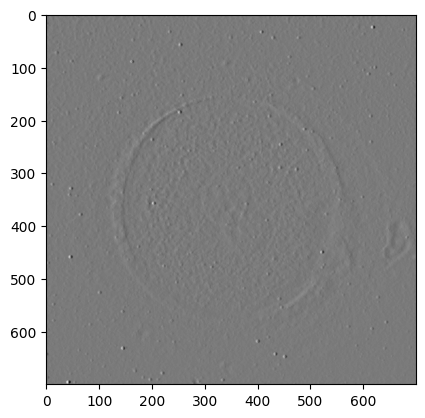

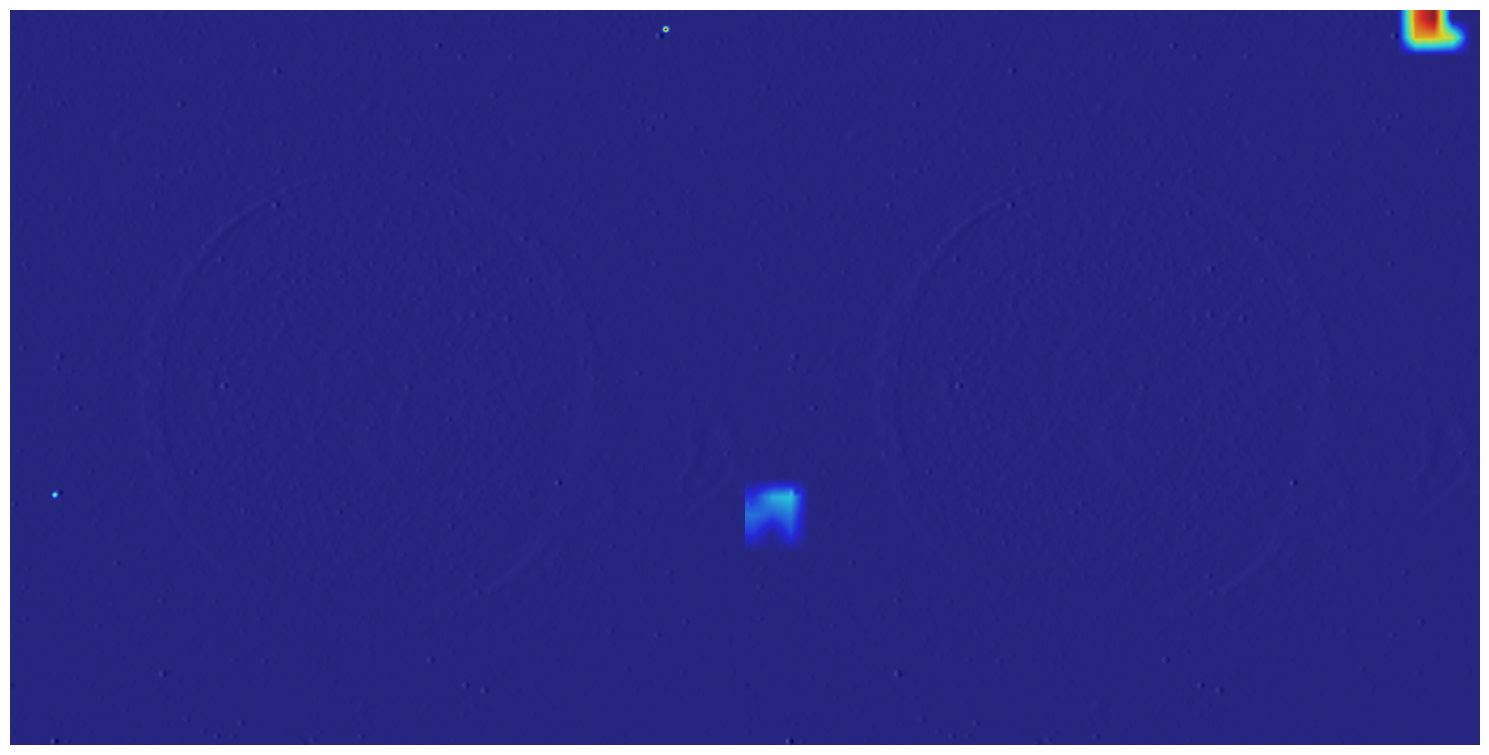

1/1 [==============================] - 0s 19ms/step
good(1).png 
 [[0.25970128]]


In [ ]:
import random
sample_dir = train_good_dir
sample_name = random.choice(os.listdir(sample_dir))
sample_path = os.path.join(sample_dir, sample_name)
plt.imshow(plt.imread(sample_path), cmap="gray")
plot_heatmap(img_path=sample_path, target_size=(700, 700), model=net, layer_indices=range(1, 3))
pred = net.predict(preprocess(img_path=sample_path, target_size=(700, 700)))
print(sample_name, "\n", np.array(pred))

In [ ]:
def get_heatmap(img_path, target_size, model, layer_indices):
    input_img = preprocess(img_path, target_size=target_size)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    intermediate_models = get_intermediate_models(model, layer_indices)

    level_maps = None
    for intermediate_model in intermediate_models:
        activations = intermediate_model.predict(input_img)
        weights = postprocess_activations(activations, target_size)
        heatmap = apply_heatmap(weights, img)
        if level_maps is None:
            level_maps = heatmap
        else:
            level_maps = np.concatenate([level_maps, heatmap], axis=1)

    return level_maps

1/1 [==============================] - 0s 18ms/step


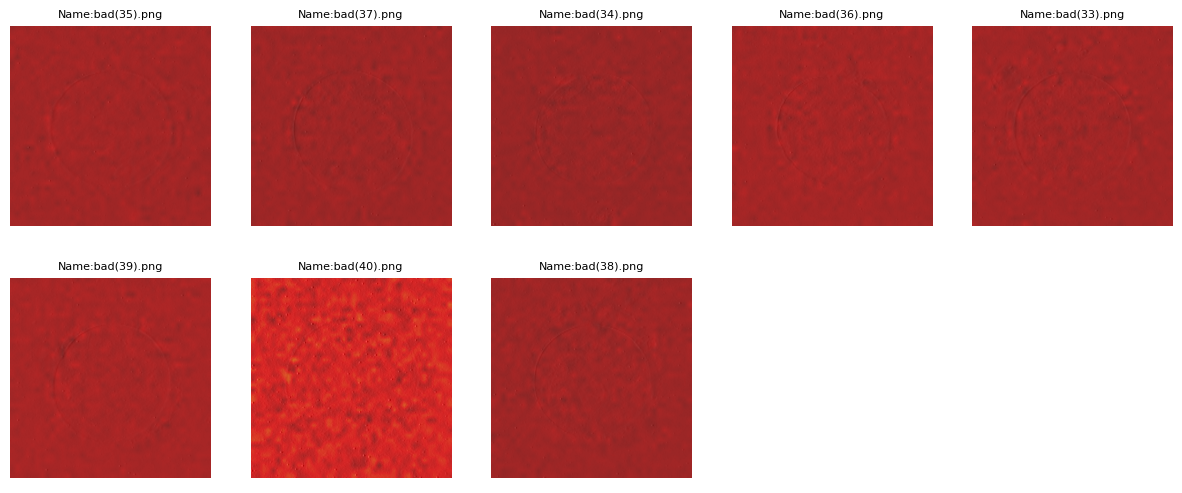

In [ ]:
target_dir = test_bad_dir
target_images = os.listdir(target_dir)

column_number = 5
row_number = int(np.ceil(len(target_images) / column_number))
fig_size = (column_number * 3, row_number * 3)

fig, axs = plt.subplots(row_number, column_number, figsize=fig_size)

# 確保axs始終是二維的
if row_number == 1:
    axs = axs[np.newaxis, :]  # 將axs轉換為二維陣列

for i, image in enumerate(target_images):
    image_path = os.path.join(target_dir, image)
    img = np.asarray(Image.open(image_path))

    ax = axs[i // column_number, i % column_number]
    ax.imshow(get_heatmap(img_path=image_path, target_size=(700, 700), model=net, layer_indices=range(2, 3)))
    pred = net.predict(preprocess(img_path=image_path, target_size=(700, 700)))

    ax.set_title(f"Name:{image}", fontsize=8)
    ax.axis('off')

# 將多出來的子圖設置為空
for i in range(len(target_images), row_number * column_number):
    ax = axs[i // column_number, i % column_number]
    ax.axis('off')

plt.show()